# **KHANIF FAUZI PAMBUDI (LIVE CODE 3 PHASE 1)**

# **PROBLEMS**

Menggunakan dataset https://www.kaggle.com/amansaxena/lifeexpectancy, buatlah model machine learning unsupervised menggunakan KMeans untuk mendeteksi kelompok negara dan jawab beberapa pertanyaan di bawah sebagai acuan analisa/cerita:


1.   Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan?
2.   Berapa cluster yang berhasil kamu peroleh dari dataset tersebut? apakah sudah optimal? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

1.   Bagaimana karakteristik dari masing-masing cluster? Bisakah kamu visualisasikan dan ceritakan?
2.   Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3?

1.   Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh? coba ceritakan analisamu!

# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

# **DATA LOADING**

In [ ]:
df=pd.read_csv("/content/Life_expectancy_dataset.csv", encoding="latin-1")
df

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [ ]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [ ]:
df.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


# **DATA EXPLORATION**

In [ ]:
len(df)

223

In [ ]:
df.shape

(223, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,223.0,112.000000,64.518731,1.0,56.50,112.0,167.50,223.0
Overall Life,223.0,72.487892,8.459335,50.2,67.45,74.9,78.60,89.5
Male Life,223.0,70.041704,8.074942,48.6,64.50,72.2,75.85,85.6
Female Life,223.0,75.019283,8.986633,51.0,69.75,77.9,81.60,93.5


In [ ]:
nmbr_cols=df[df.describe().columns.values]
nmbr_cols

,Rank,Overall Life,Male Life,Female Life
0,1,89.5,85.6,93.5
1,2,85.0,81.7,88.5
2,3,85.0,82.3,87.8
3,4,84.5,81.6,87.6
4,5,83.3,80.7,86.1
...,...,...,...,...
218,219,52.1,51.6,52.5
219,220,51.6,52.2,51.0
220,221,51.3,49.9,52.7
221,222,50.6,48.6,52.7


In [ ]:
ctg_cols=df.drop(columns=df.describe().columns.values)
ctg_cols

,Country,Continent
0,Monaco,Europe
1,Japan,Asia
2,Singapore,Asia
3,Macau; China,Asia
4,San Marino,Europe
...,...,...
218,Gabon,Africa
219,Swaziland,Africa
220,Afghanistan,Asia
221,Guinea-Bissau,Africa


# **MISSING VALUE**

In [ ]:
df.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

tidak terdapat missing value

# **DATA PREPROCESSING**

In [ ]:
df=df.rename(columns={'Overall Life':'Overall_Life','Male Life':'Male_Life','Female Life':'Female_Life'})
df

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


# **EDA**

In [ ]:
df['Rank'].value_counts()

223    1
70     1
81     1
80     1
79     1
      ..
145    1
144    1
143    1
142    1
1      1
Name: Rank, Length: 223, dtype: int64

In [ ]:
df['Country'].value_counts()

Solomon Islands    1
Iraq               1
Andorra            1
Samoa              1
Barbados           1
                  ..
Panama             1
New Caledonia      1
American Samoa     1
Norway             1
Angola             1
Name: Country, Length: 223, dtype: int64

In [ ]:
df['Continent'].value_counts()

Africa           55
Europe           51
Asia             49
North America    34
Oceania          20
South America    14
Name: Continent, dtype: int64

Text(0.5, 1.0, 'Overall Life')

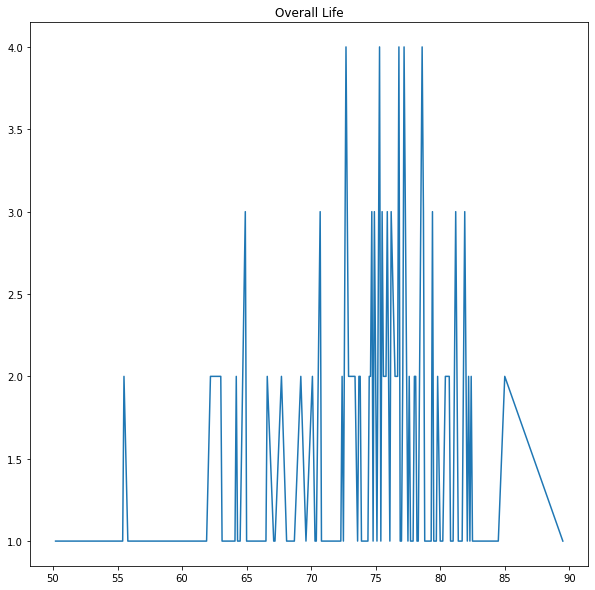

In [ ]:
plt.figure(figsize=(10,10))
val=df.Overall_Life.value_counts()
sns.lineplot(x=val.index, y=val.values)
plt.title('Overall Life')

Text(0.5, 1.0, 'Male Life')

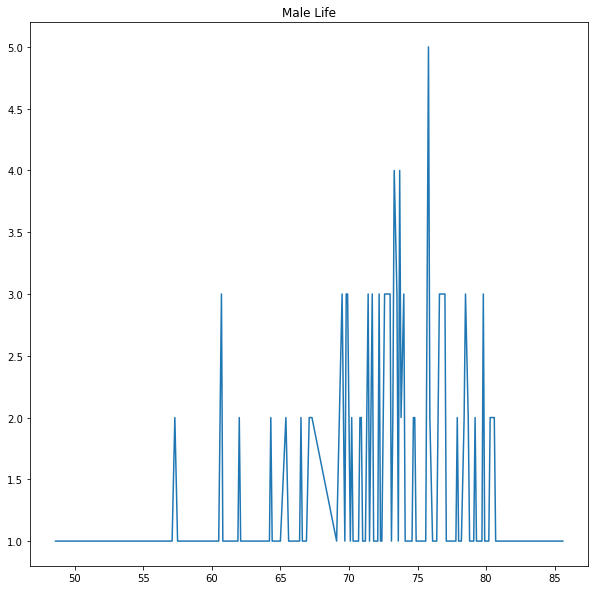

In [ ]:
plt.figure(figsize=(10, 10))
val=df.Male_Life.value_counts()
sns.lineplot(x=val.index, y=val.values)
plt.title('Male Life')

Text(0.5, 1.0, 'Female Life')

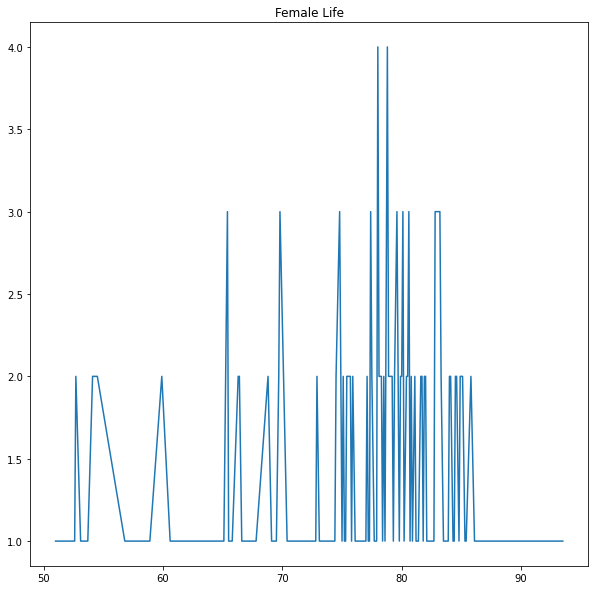

In [231]:
plt.figure(figsize=(10,10))
val=df.Female_Life.value_counts()
sns.lineplot(x=val.index, y=val.values)
plt.title('Female Life')

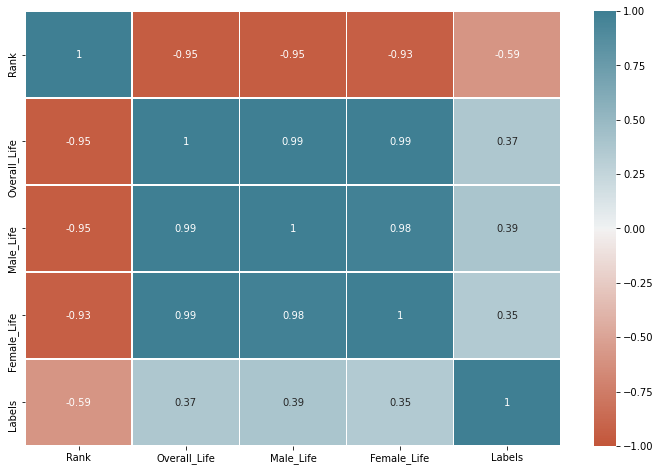

In [232]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

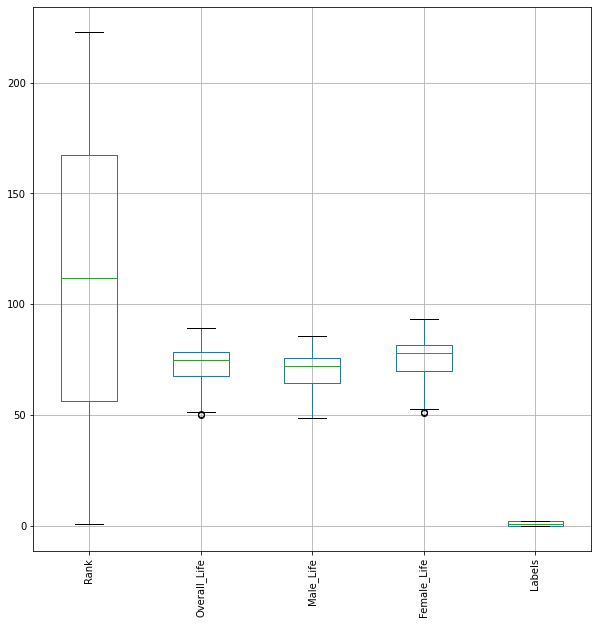

In [233]:
df.boxplot(rot=90, figsize=(10,10))

dari persebaran data yang ditampilkan masih terdapat outliers pada data set tersebut

# **EDA ANALYSIS**

Dari hasil eksplorasi data yang dilakukan dapat disimpulkan bahwa female life lebih baik dibandingkan dengan male life dengan persebaran taraf hidup lebih lama. Kemudian korelasi antar data male life, female life memiliki nilai yang sangat tinggi. Untuk data rank, country, dan continent tidak digunakan pada saat proses reduksi dimensi dan clustering karena persebaran datanya merupakan data kategorikal.

# **PCA**

In [ ]:
nmbr_dat=df.drop(columns=['Rank','Country','Continent'])

In [ ]:
scaler=StandardScaler()
nmbr_dat_std=scaler.fit_transform(nmbr_dat)

In [ ]:
nmbr_dat_std.shape

(223, 3)

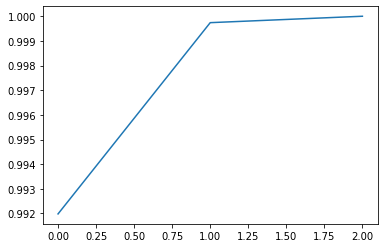

In [ ]:
pca=PCA(whiten=True)
pca.fit(nmbr_dat)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

In [ ]:
np.sum(pca.explained_variance_ratio_)

1.0

In [ ]:
pca.n_components_

3

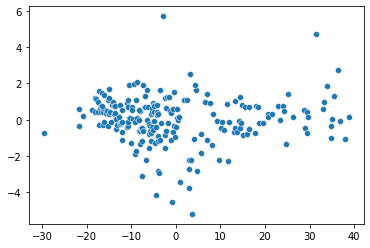

In [ ]:
X2D=PCA(n_components=2).fit_transform(nmbr_dat)
sns.scatterplot(x=X2D[:,0],y=X2D[:,1])

# **K-MEANS CLUSTERRING**

In [ ]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

In [ ]:
X=PCA(n_components=2).fit_transform(nmbr_dat)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.labels_)
print(kmeans.inertia_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
7527.666085657074


In [ ]:
len(kmeans.labels_)

223

# **K-MEANS TANPA PCA**

Text(0, 0.5, 'Inertia')

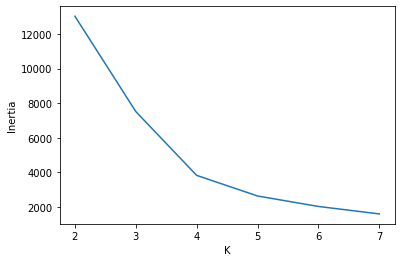

In [ ]:
K=[2,3,4,5,6,7]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

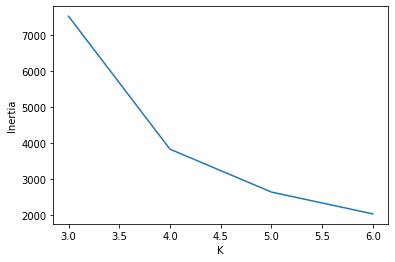

In [ ]:
K=[3,4,5,6]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

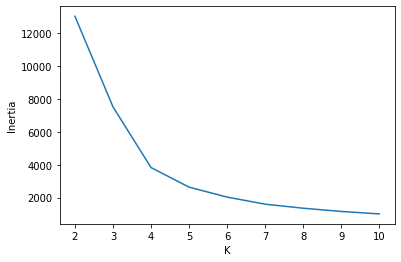

In [ ]:
K=[2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

For n_clusters = 2 The average silhouette_score is : 0.6602462801877551
For n_clusters = 3 The average silhouette_score is : 0.5085937524413116
For n_clusters = 4 The average silhouette_score is : 0.5409517763629301
For n_clusters = 5 The average silhouette_score is : 0.5199563653392326
For n_clusters = 6 The average silhouette_score is : 0.5067531363892553
For n_clusters = 7 The average silhouette_score is : 0.47793909406748764
For n_clusters = 8 The average silhouette_score is : 0.45710976989739815
For n_clusters = 9 The average silhouette_score is : 0.46850895885910926
For n_clusters = 10 The average silhouette_score is : 0.4477413106362377


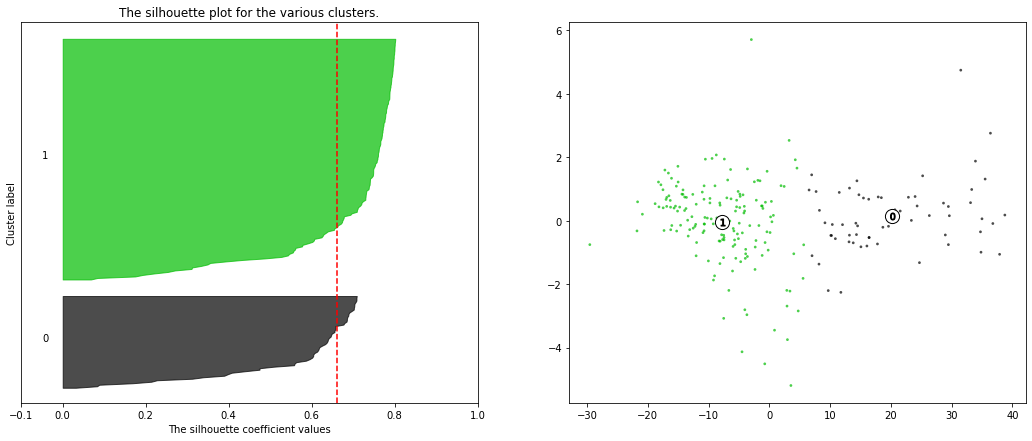

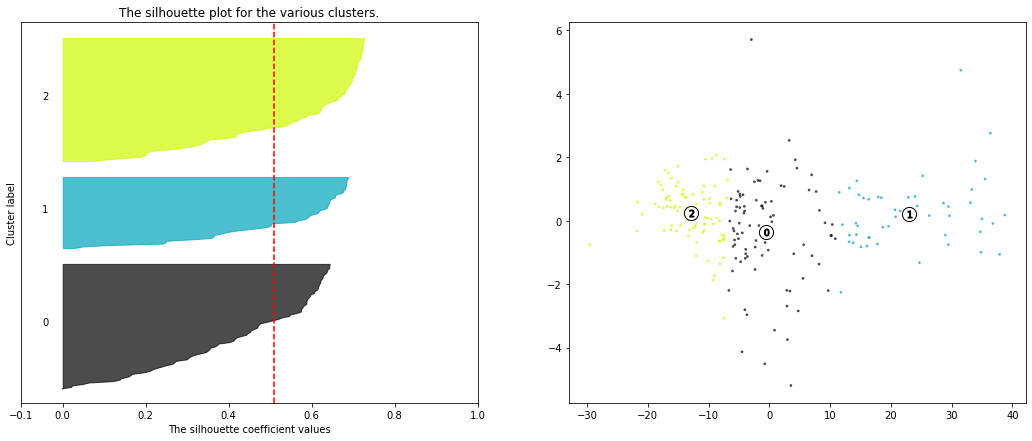

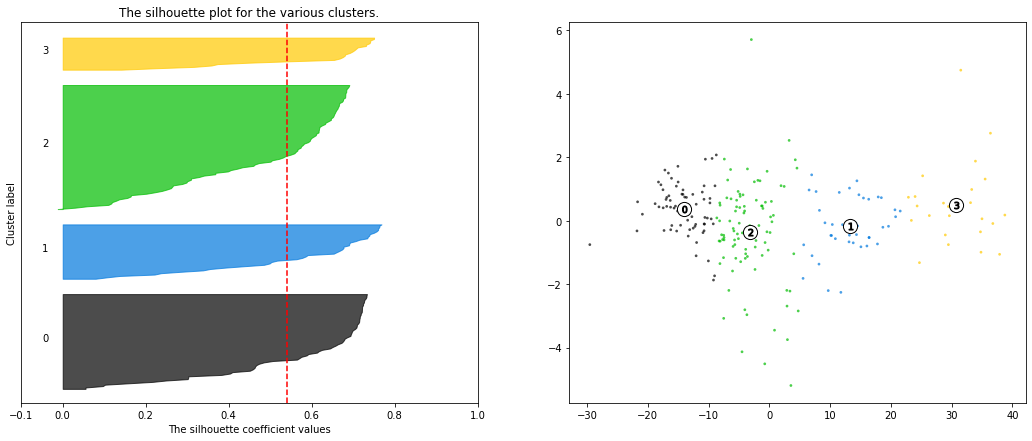

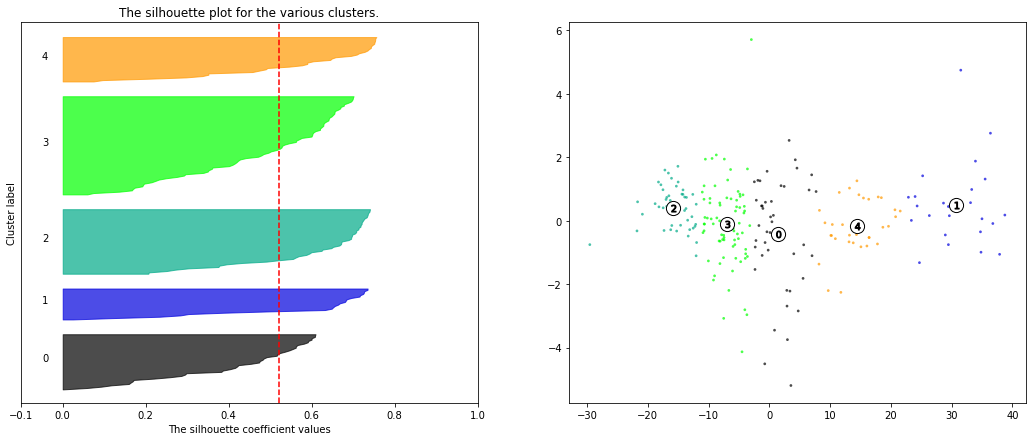

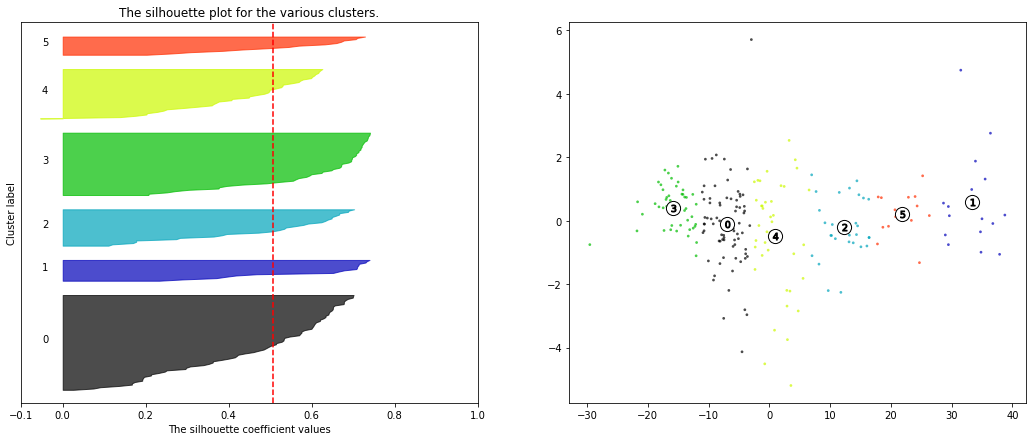

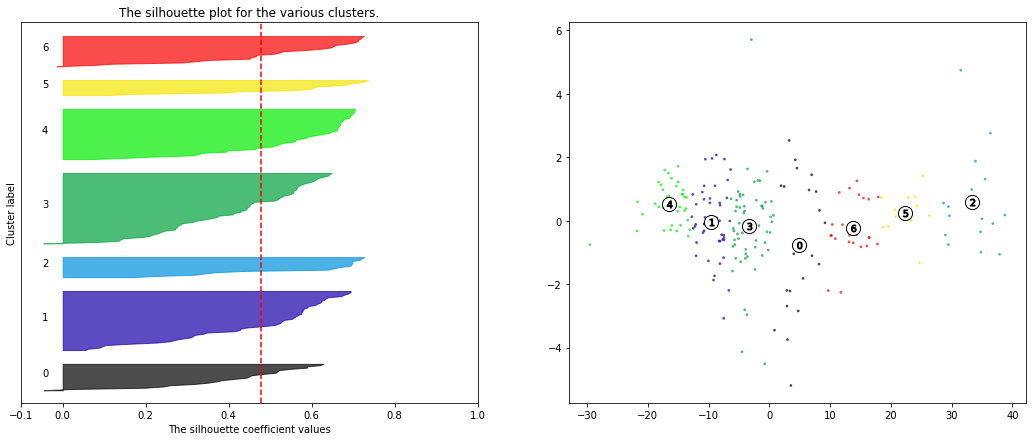

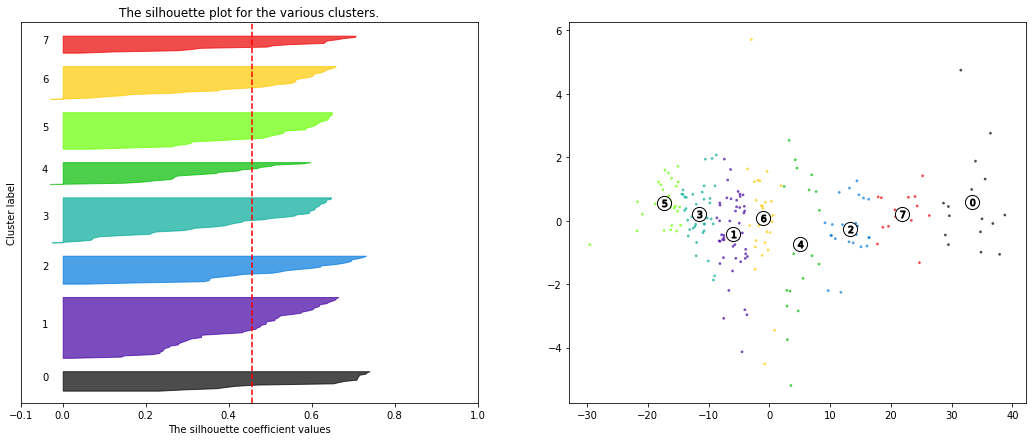

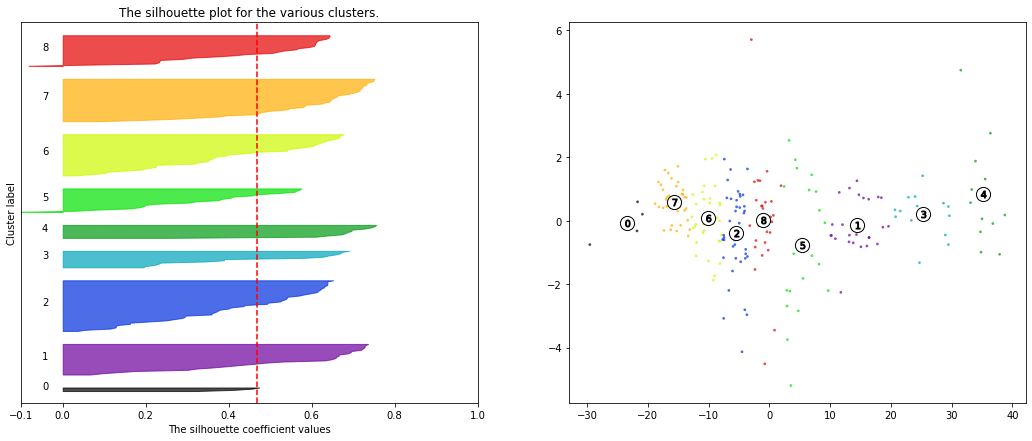

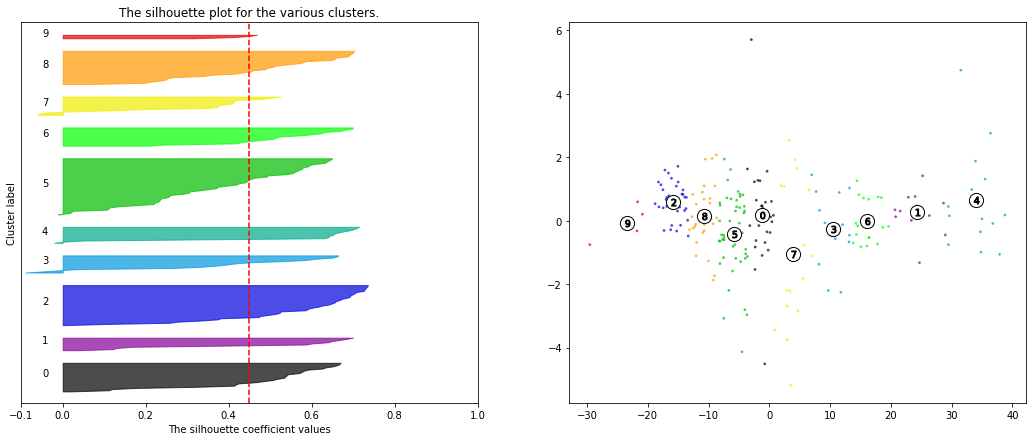

In [ ]:
plot_silhouette(K,X)

silhoutte tertinggi berada pada nilai K = 2

# **K-MEANS MENGGUNAKAN PCA**

Text(0, 0.5, 'Inertia')

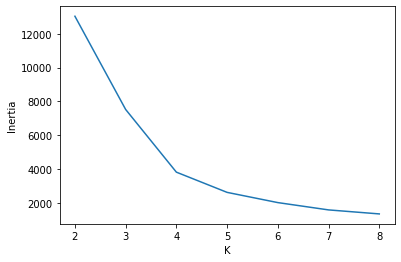

In [ ]:
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(X2D).inertia_ for i in K]
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette Score')

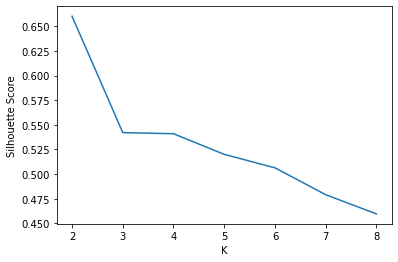

In [ ]:
K=[2,3,4,5,6,7,8]
#inertia=[KMeans(n_clusters=i).fit(X2D).inertia_ for i in K]
s_score=[silhouette_score(X2D, KMeans(n_clusters=i).fit(X2D).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Untuk k-means menggunakan PCA nilai silhouette tertinggi sama pada k-means tanpa PCA yaitu K = 2

For n_clusters = 2 The average silhouette_score is : 0.6602462801877551
For n_clusters = 3 The average silhouette_score is : 0.5085937524413116
For n_clusters = 4 The average silhouette_score is : 0.5409517763629301
For n_clusters = 5 The average silhouette_score is : 0.5199563653392326
For n_clusters = 6 The average silhouette_score is : 0.5067531363892553
For n_clusters = 7 The average silhouette_score is : 0.47793909406748764
For n_clusters = 8 The average silhouette_score is : 0.45710976989739815


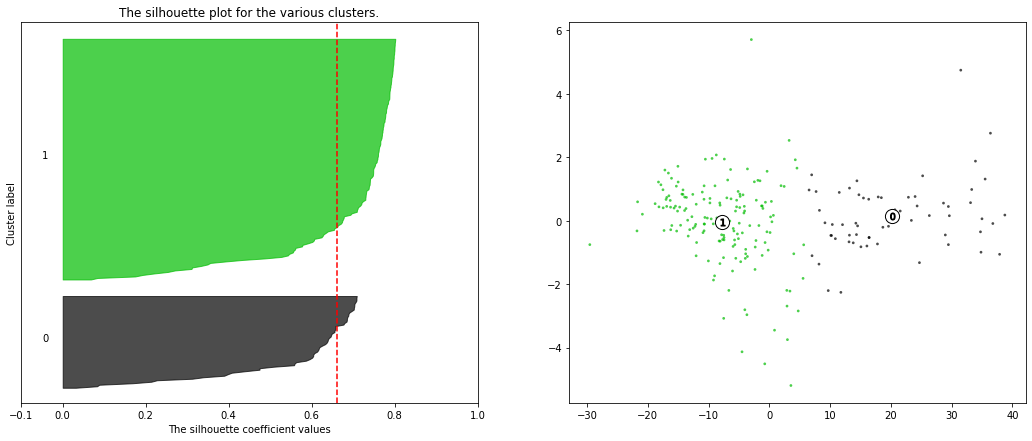

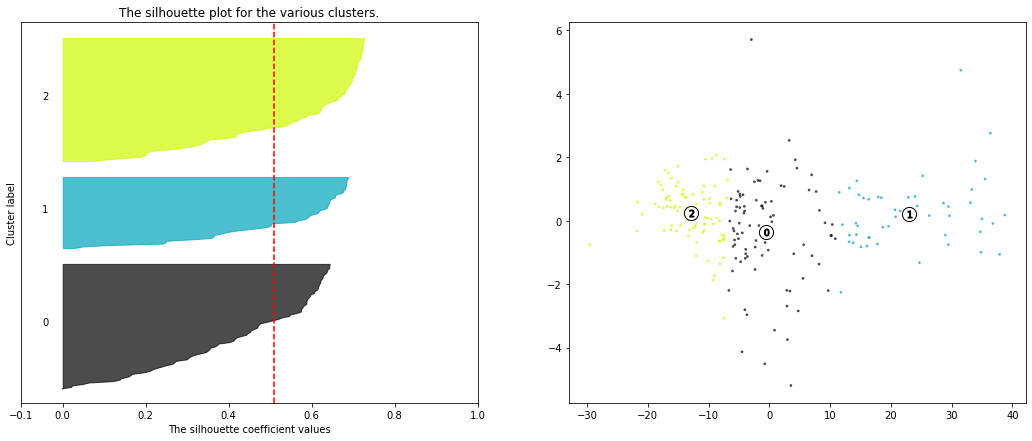

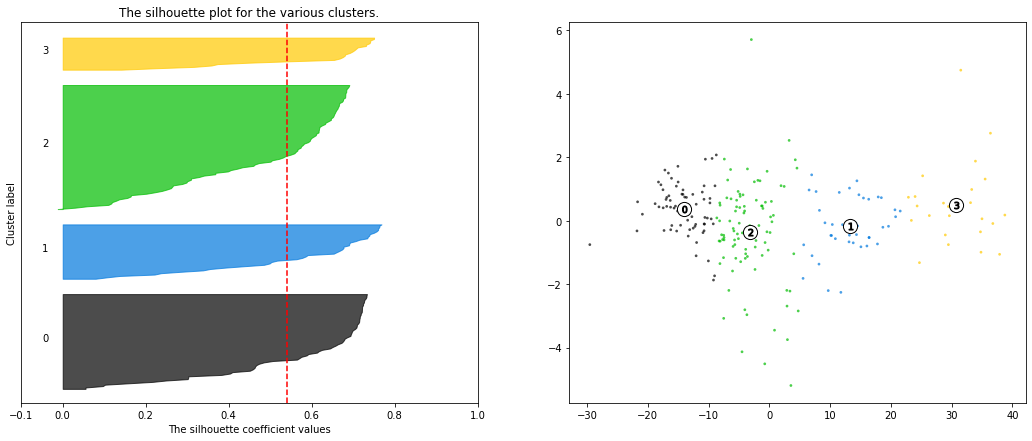

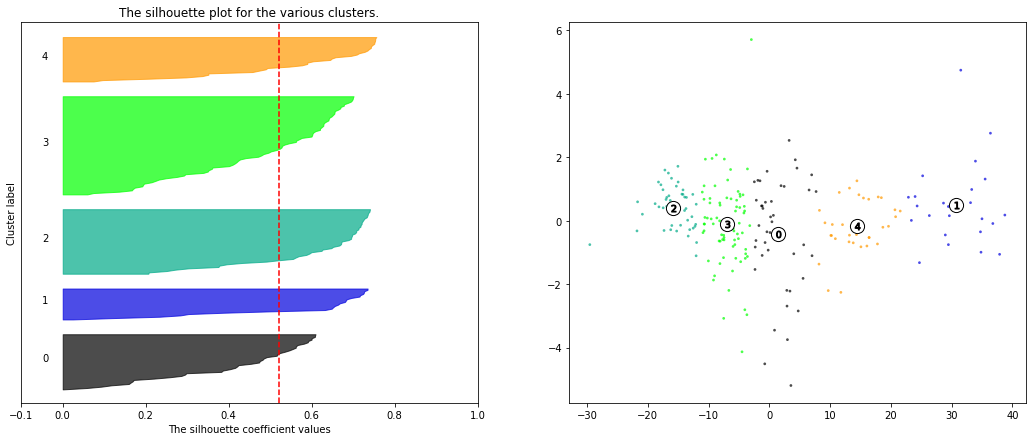

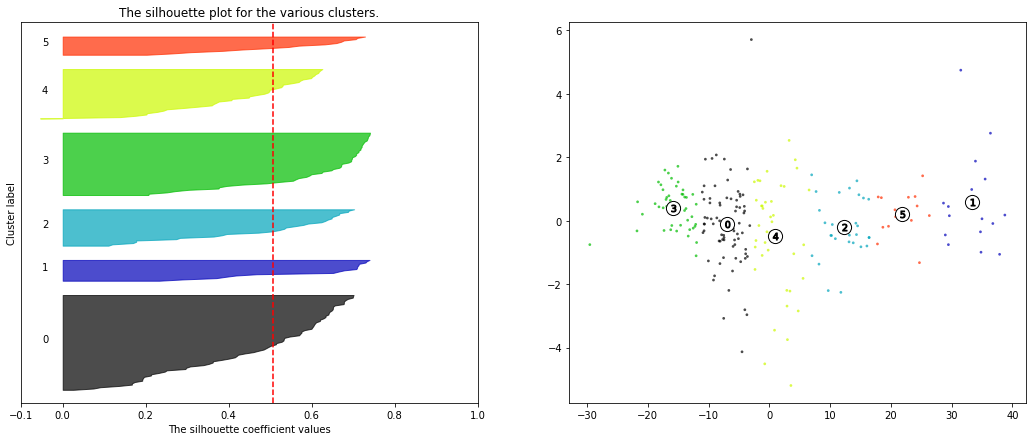

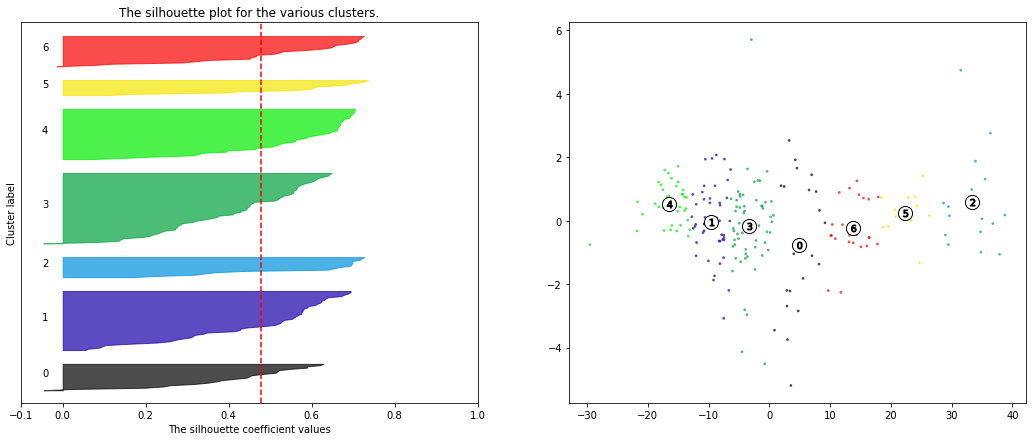

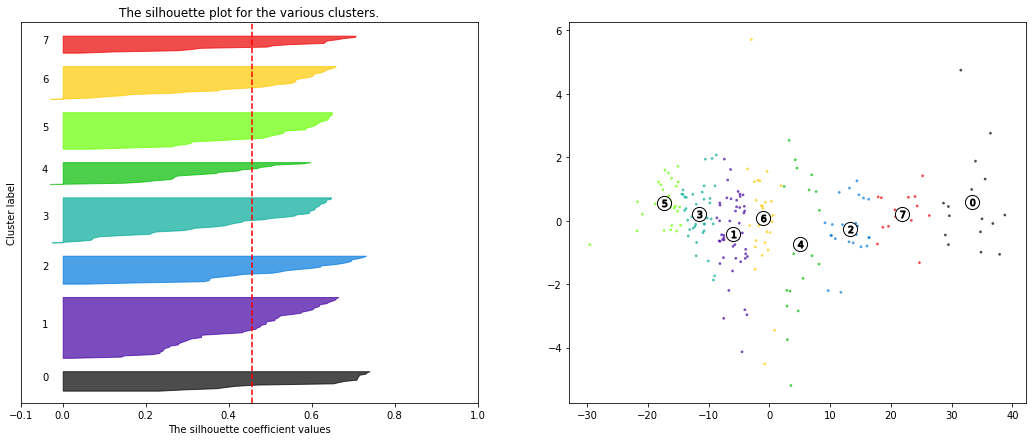

In [ ]:
plot_silhouette(K,X2D)

# **MODEL INFERENCE**

In [ ]:
df

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [ ]:
df['Labels'] = kmeans.labels_

In [ ]:
df

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent,Labels
0,1,Monaco,89.5,85.6,93.5,Europe,2
1,2,Japan,85.0,81.7,88.5,Asia,2
2,3,Singapore,85.0,82.3,87.8,Asia,2
3,4,Macau; China,84.5,81.6,87.6,Asia,2
4,5,San Marino,83.3,80.7,86.1,Europe,2
...,...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa,1
219,220,Swaziland,51.6,52.2,51.0,Africa,1
220,221,Afghanistan,51.3,49.9,52.7,Asia,1
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa,1


In [ ]:
df.Labels.unique()

array([2, 0, 1], dtype=int32)

In [234]:
df_lab_0 = df[df['Labels'] == 0]
df_lab_0

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent,Labels
86,87,Georgia,76.2,72.1,80.6,Europe,0
87,88,Republic of Macedonia,76.2,73.6,79.0,Europe,0
88,89,Tonga,76.2,74.7,77.8,Oceania,0
89,90,Tunisia,76.1,74.0,78.4,Africa,0
90,91,Croatia,75.9,72.7,79.2,Europe,0
...,...,...,...,...,...,...,...
168,169,Nauru,67.1,63.0,70.5,Oceania,0
169,170,Burma,66.6,64.2,69.2,Asia,0
170,171,Ghana,66.6,64.1,69.1,Africa,0
171,172,Tuvalu,66.5,64.3,68.8,Oceania,0


In [235]:
len(df_lab_0)

87

In [236]:
df_lab_1 = df[df['Labels'] == 1]
df_lab_1

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent,Labels
173,174,Madagascar,65.9,64.4,67.4,Africa,1
174,175,Yemen,65.5,63.4,67.8,Asia,1
175,176,Togo,65.0,62.3,69.7,Africa,1
176,177,Eritrea,64.9,62.4,67.5,Africa,1
177,178,São Tomé and Príncipe,64.9,63.6,66.3,Africa,1
178,179,The Gambia,64.9,62.5,67.3,Africa,1
179,180,Cambodia,64.5,62.0,67.1,Asia,1
180,181,Laos,64.3,62.2,66.4,Asia,1
181,182,Comoros,64.2,61.9,66.6,Africa,1
182,183,Equatorial Guinea,64.2,63.1,65.4,Africa,1


In [237]:
len(df_lab_1)

50

In [238]:
df_lab_2 = df[df['Labels'] == 2]
df_lab_2

,Rank,Country,Overall_Life,Male_Life,Female_Life,Continent,Labels
0,1,Monaco,89.5,85.6,93.5,Europe,2
1,2,Japan,85.0,81.7,88.5,Asia,2
2,3,Singapore,85.0,82.3,87.8,Asia,2
3,4,Macau; China,84.5,81.6,87.6,Asia,2
4,5,San Marino,83.3,80.7,86.1,Europe,2
...,...,...,...,...,...,...,...
81,82,Sri Lanka,76.8,73.3,80.4,Asia,2
82,83,Bosnia and Herzegovina,76.7,73.7,80.0,Europe,2
83,84,Estonia,76.7,71.9,81.7,Europe,2
84,85,Antigua and Barbuda,76.5,74.4,78.8,North America,2


In [239]:
len(df_lab_2)

86

# **OVERALL ANALYSIS**

Setelah dilakukan klasterisasi pada data set tersebut menggunakan model k-means pada percobaan pertama n_cluster di set sebanyak 2 cluster persebaran kelas tidak terklasterisasi semuanya hanya 150 data set yang ter klaster sedangkan pada percobaan kedua n_cluster diubah menjadi 3 klaster maka semua data terklasterisasi dengan baik dengan persebaran kelas pada label 0 sebanyak 87 data, label 1 sebanyak 50 data, dan label 2 sebanyak 86 data

Bisa dilihat dari kecenderungan atau karakteristik data pada tiap label untuk label 0 merupakan label data dengan taraf hidup menengah, label 1 merupakan label data dengan taraf hidup rendah, dan label 2 merupakan label data dengan taraf hidup tinggi

Untuk label 0 diisi dengan negara-negara yang beragam dari benua eropa, oceania, asia yang memiliki taraf hidup menengah

Untuk label 1 diisi seluruhnya dari negara-negara di afrika dan satu negara dari benua amerika utara yang negaranya kurang maju yaitu haiti yang artinya pada wilayah tersebut memiliki kecenderungan orang-orangnya yang memiliki taraf hidup yang rendah

Untuk label 2 diisi dengan negara-negara dari benua eropa, oceania, dan asia yang memiliki taraf hidup tinggi kemudian kita dapat melihat negara-negara di asia yang diisi oleh negara-negara dengan kualitas hidup yang baik seperti jepang, singapore, macau cina, dan vietnam